In [1]:
import sys
from importlib import reload 
sys.path.append('../hdssm_story/lib')

In [2]:
import utils  # expand_to_hyperboloid
utils = reload(utils)

import distances  # Distances, DistancesAggregator, ProductDistances
distances = reload(distances)
from distances import Distances, ProductDistances

import dssm  # DSSM_V2, JustEmbedding
dssm = reload(dssm)

import layers  # SphericalExponentialMapLayer, HyperbolicalExponentialMapLayer
layers = reload(layers)

In [3]:
utils.self_tests()

expand_to_hyperboloid unittest #1


In [4]:
distances.self_tests()

DistancesAggregator unittest #1...
DistancesAggregator unittest #2...
ProductDistances unittest #1...
ProductDistances unittest #2...
ProductDistances unittest #3...
ProductDistances unittest #4...
str(pd) = E2,S3,H3


In [5]:
layers.self_tests()

SphericalExponentialMapLayer UT 1
SphericalExponentialMapLayer UT 2
HyperbolicalExponentialMapLayer UT 1
HyperbolicalExponentialMapLayer UT 2


________________________

In [6]:
import networkx as nx
import numpy as np
import tensorflow as tf
import tqdm

assert int(tf.__version__.split(".")[0]) >= 2

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [20]:
def make_model(l=312):
    return dssm.JustEmbedding(l, emb_size=10)

def make_model_2(emb_size=10, l=312):
    return dssm.JustEmbedding(l, emb_size=emb_size)

def make_distances(for_ranking=False):
    return [
        ProductDistances([
            (10, Distances("euclidian_corrected" if for_ranking else "euclidian",
                           scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0_corrected" if for_ranking else "triple_trainable_l0",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected" if for_ranking else "triple_trainable_l1_sq",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected" if for_ranking else "triple_trainable_l1",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_hs_corrected" if for_ranking else "triple_trainable_l1_hs",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_ex_corrected" if for_ranking else "triple_trainable_l1_ex",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_ex_corrected" if for_ranking else "triple_trainable_l1_sq_ex",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("inverted_dot", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("expanded_hyp", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("hyperspherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("expanded_hyp", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_3():
    return [
        ProductDistances([
            (11, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (6, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_exp_dot(k=1):
    return [
        ProductDistances([
            (10, Distances("exp_minus_dot", scalable=True))
        ], "sum")
        for _ in range(k)
    ]


def make_distances_4():
    # only not-corrected ttl1 metrices
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
    ]

def make_distances_5(for_ranking):
    # only not-corrected ttl1 metrices
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l1_ex_corrected" if for_ranking else "triple_trainable_l1_ex",
                           scalable=True))
        ], "sum"),
    ]

def make_distances_wips(for_ranking, k=3):
    # only not-corrected ttl1 metrices
    return [
        ProductDistances([
            (10, Distances("wips",
                           scalable=True))
        ], "sum")
        for _ in range(k)
    ]

_____________


In [8]:
!ls ../datasets

3d_sphere_triang_120.edges   clique_4.edges		  graph.clusters
3d_sphere_triang_1920.edges  clique_5.edges		  karate.edges
3d_sphere_triang_30.edges    conflict.edges		  polblogs.edges
3d_sphere_triang_480.edges   cora			  polbooks.edges
airport.edges		     CSPhDs.edges		  power.edges
bg_20_700_0.05.edges	     cycle_100.edges		  reactome.edges
bipartite_100.edges	     cycle_5.edges		  smalltree.edges
bipartite_5.edges	     dolphins.edges		  star_100.edges
ca-cit-HepTh.edges	     eu-core.edges		  star_5.edges
Ca-HelpTh.edges		     eu-core-no-self-loops.edges  tree_3_6.edges
chicago.edges		     euroroad.edges		  usca312.edges
citeseer		     EuroSiS.edges		  wla6.edges
clique_100.edges	     facebook.edges		  wla6.nodes
clique_12.edges		     football.edges


In [9]:
!head ../datasets/eu-core.edges

2	2
2	202
2	961
2	161
2	433
2	436
2	643
2	644
2	486
2	485


In [8]:
G, distances_matrix, r_matrix  = utils.get_dataset("eu-core.edges", True, True)
make_model_g = lambda : make_model(len(G.nodes()))
d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/eu-core.edges
|V| = 986, |E| = 16687


In [11]:
!mkdir pngs

mkdir: cannot create directory ‘pngs’: File exists


_____________________
# Training

In [126]:
distortion_loss_storyz = list()

In [127]:
def print_best_distortion():
    for i, d in enumerate(make_distances(False)+make_distances_exp_dot()):
        ar = np.array([
            distortion_loss_story_nth[i][-1]
            for distortion_loss_story_nth in distortion_loss_storyz
        ])
        # print(ar)
        print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

In [129]:
def do_distortion_for_lr(lr=0.05):
    distortion_loss_storyz.append(
        utils.estimate_signatures_distortion(
            make_model_2, qs, distances_matrix, r_matrix,
            make_distances(False)+make_distances_exp_dot(), 2000, learning_rate=lr,
            loss_eval_interval=20, draw_interval=20,
            different_d_sum=True, print_results=True
        )
    )
    
    print("\n\n=== Current global best:\n")
    print_best_distortion()

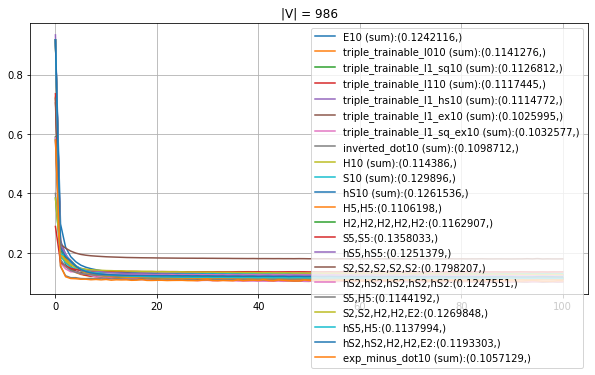

0.1242116	E10 (sum)
0.1141276	triple_trainable_l010 (sum)
0.1126812	triple_trainable_l1_sq10 (sum)
0.1117445	triple_trainable_l110 (sum)
0.1114772	triple_trainable_l1_hs10 (sum)
0.1025995	triple_trainable_l1_ex10 (sum)
0.1032577	triple_trainable_l1_sq_ex10 (sum)
0.1098712	inverted_dot10 (sum)
0.114386	H10 (sum)
0.129896	S10 (sum)
0.1261536	hS10 (sum)
0.1106198	H5,H5
0.1162907	H2,H2,H2,H2,H2
0.1358033	S5,S5
0.1251379	hS5,hS5
0.1798207	S2,S2,S2,S2,S2
0.1247551	hS2,hS2,hS2,hS2,hS2
0.1144192	S5,H5
0.1269848	S2,S2,H2,H2,E2
0.1137994	hS5,H5
0.1193303	hS2,hS2,H2,H2,E2
0.1057129	exp_minus_dot10 (sum)


=== Current global best:

(0.1242116,)	E10 (sum)
(0.1141276,)	triple_trainable_l010 (sum)
(0.1126812,)	triple_trainable_l1_sq10 (sum)
(0.1117445,)	triple_trainable_l110 (sum)
(0.1114772,)	triple_trainable_l1_hs10 (sum)
(0.1025995,)	triple_trainable_l1_ex10 (sum)
(0.1032577,)	triple_trainable_l1_sq_ex10 (sum)
(0.1098712,)	inverted_dot10 (sum)
(0.114386,)	H10 (sum)
(0.129896,)	S10 (sum)
(0.1261536

In [130]:
do_distortion_for_lr(0.1)

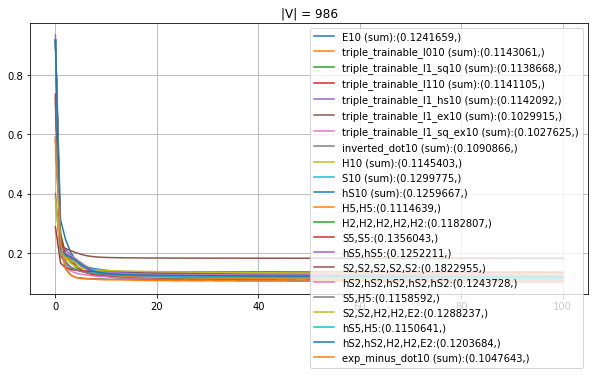

0.1241659	E10 (sum)
0.1143061	triple_trainable_l010 (sum)
0.1138668	triple_trainable_l1_sq10 (sum)
0.1141105	triple_trainable_l110 (sum)
0.1142092	triple_trainable_l1_hs10 (sum)
0.1029915	triple_trainable_l1_ex10 (sum)
0.1027625	triple_trainable_l1_sq_ex10 (sum)
0.1090866	inverted_dot10 (sum)
0.1145403	H10 (sum)
0.1299775	S10 (sum)
0.1259667	hS10 (sum)
0.1114639	H5,H5
0.1182807	H2,H2,H2,H2,H2
0.1356043	S5,S5
0.1252211	hS5,hS5
0.1822955	S2,S2,S2,S2,S2
0.1243728	hS2,hS2,hS2,hS2,hS2
0.1158592	S5,H5
0.1288237	S2,S2,H2,H2,E2
0.1150641	hS5,H5
0.1203684	hS2,hS2,H2,H2,E2
0.1047643	exp_minus_dot10 (sum)


=== Current global best:

(0.1241659,)	E10 (sum)
(0.1141276,)	triple_trainable_l010 (sum)
(0.1126812,)	triple_trainable_l1_sq10 (sum)
(0.1117445,)	triple_trainable_l110 (sum)
(0.1114772,)	triple_trainable_l1_hs10 (sum)
(0.1025995,)	triple_trainable_l1_ex10 (sum)
(0.1027625,)	triple_trainable_l1_sq_ex10 (sum)
(0.1090866,)	inverted_dot10 (sum)
(0.114386,)	H10 (sum)
(0.129896,)	S10 (sum)
(0.12596

In [131]:
do_distortion_for_lr(0.05)

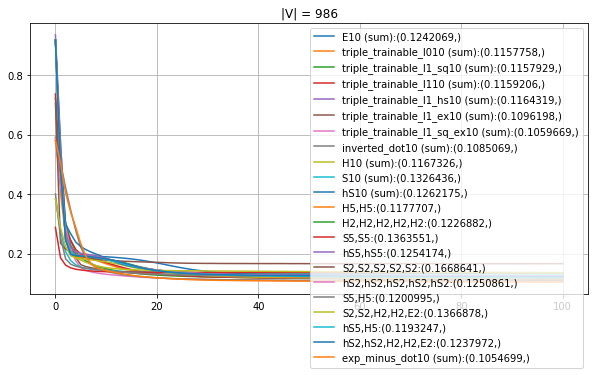

0.1242069	E10 (sum)
0.1157758	triple_trainable_l010 (sum)
0.1157929	triple_trainable_l1_sq10 (sum)
0.1159206	triple_trainable_l110 (sum)
0.1164319	triple_trainable_l1_hs10 (sum)
0.1096198	triple_trainable_l1_ex10 (sum)
0.1059669	triple_trainable_l1_sq_ex10 (sum)
0.1085069	inverted_dot10 (sum)
0.1167326	H10 (sum)
0.1326436	S10 (sum)
0.1262175	hS10 (sum)
0.1177707	H5,H5
0.1226882	H2,H2,H2,H2,H2
0.1363551	S5,S5
0.1254174	hS5,hS5
0.1668641	S2,S2,S2,S2,S2
0.1250861	hS2,hS2,hS2,hS2,hS2
0.1200995	S5,H5
0.1366878	S2,S2,H2,H2,E2
0.1193247	hS5,H5
0.1237972	hS2,hS2,H2,H2,E2
0.1054699	exp_minus_dot10 (sum)


=== Current global best:

(0.1241659,)	E10 (sum)
(0.1141276,)	triple_trainable_l010 (sum)
(0.1126812,)	triple_trainable_l1_sq10 (sum)
(0.1117445,)	triple_trainable_l110 (sum)
(0.1114772,)	triple_trainable_l1_hs10 (sum)
(0.1025995,)	triple_trainable_l1_ex10 (sum)
(0.1027625,)	triple_trainable_l1_sq_ex10 (sum)
(0.1085069,)	inverted_dot10 (sum)
(0.114386,)	H10 (sum)
(0.129896,)	S10 (sum)
(0.12596

In [132]:
do_distortion_for_lr(0.01)

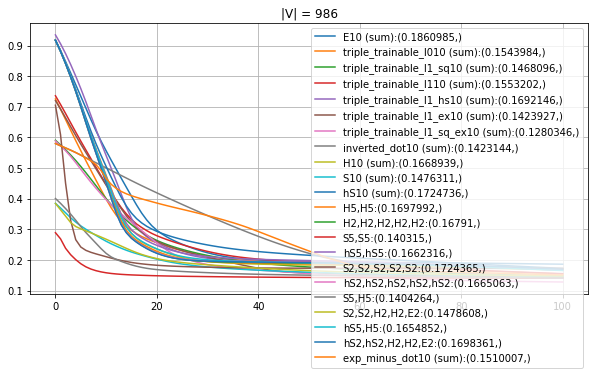

0.1860985	E10 (sum)
0.1543984	triple_trainable_l010 (sum)
0.1468096	triple_trainable_l1_sq10 (sum)
0.1553202	triple_trainable_l110 (sum)
0.1692146	triple_trainable_l1_hs10 (sum)
0.1423927	triple_trainable_l1_ex10 (sum)
0.1280346	triple_trainable_l1_sq_ex10 (sum)
0.1423144	inverted_dot10 (sum)
0.1668939	H10 (sum)
0.1476311	S10 (sum)
0.1724736	hS10 (sum)
0.1697992	H5,H5
0.16791	H2,H2,H2,H2,H2
0.140315	S5,S5
0.1662316	hS5,hS5
0.1724365	S2,S2,S2,S2,S2
0.1665063	hS2,hS2,hS2,hS2,hS2
0.1404264	S5,H5
0.1478608	S2,S2,H2,H2,E2
0.1654852	hS5,H5
0.1698361	hS2,hS2,H2,H2,E2
0.1510007	exp_minus_dot10 (sum)


=== Current global best:

(0.1241659,)	E10 (sum)
(0.1141276,)	triple_trainable_l010 (sum)
(0.1126812,)	triple_trainable_l1_sq10 (sum)
(0.1117445,)	triple_trainable_l110 (sum)
(0.1114772,)	triple_trainable_l1_hs10 (sum)
(0.1025995,)	triple_trainable_l1_ex10 (sum)
(0.1027625,)	triple_trainable_l1_sq_ex10 (sum)
(0.1085069,)	inverted_dot10 (sum)
(0.114386,)	H10 (sum)
(0.129896,)	S10 (sum)
(0.1259667,

In [133]:
do_distortion_for_lr(0.001)

In [ ]:
storyz = [total_loss_story, total_loss_story_2, total_loss_story_3, total_loss_story_4]
for d, l0, l1, l2, l3 in zip(make_distances()+make_distances_exp_dot(), *storyz):
    ar = np.array([x[-1] for x in [l0, l1, l2, l3]])
    # print(f"{ar[:, 0].argmin(), ar[:, 1:].argmax(axis=0)}\t{d}")
    print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

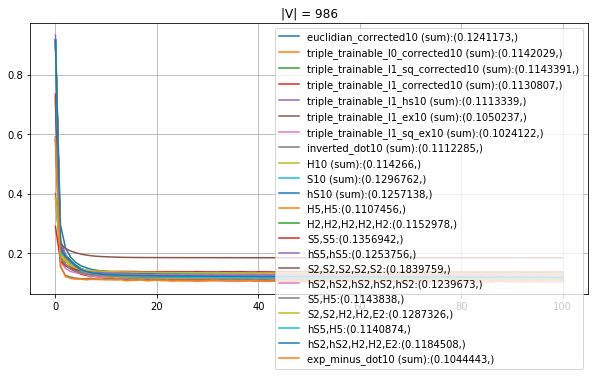


0.1241173	euclidian_corrected10 (sum)
0.1142029	triple_trainable_l0_corrected10 (sum)
0.1143391	triple_trainable_l1_sq_corrected10 (sum)
0.1130807	triple_trainable_l1_corrected10 (sum)
0.1113339	triple_trainable_l1_hs10 (sum)
0.1050237	triple_trainable_l1_ex10 (sum)
0.1024122	triple_trainable_l1_sq_ex10 (sum)
0.1112285	inverted_dot10 (sum)
0.114266	H10 (sum)
0.1296762	S10 (sum)
0.1257138	hS10 (sum)
0.1107456	H5,H5
0.1152978	H2,H2,H2,H2,H2
0.1356942	S5,S5
0.1253756	hS5,hS5
0.1839759	S2,S2,S2,S2,S2
0.1239673	hS2,hS2,hS2,hS2,hS2
0.1143838	S5,H5
0.1287326	S2,S2,H2,H2,E2
0.1140874	hS5,H5
0.1184508	hS2,hS2,H2,H2,E2
0.1044443	exp_minus_dot10 (sum)


In [12]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances()+make_distances_exp_dot(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

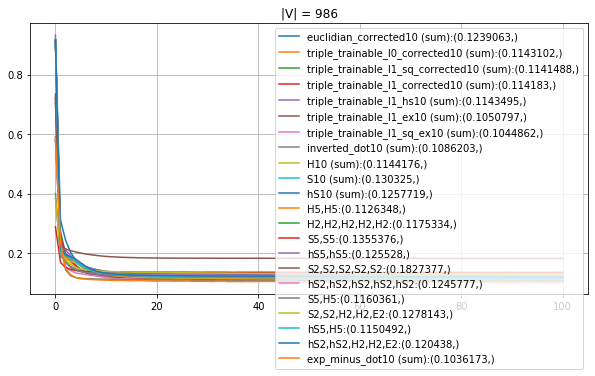


0.1239063	euclidian_corrected10 (sum)
0.1143102	triple_trainable_l0_corrected10 (sum)
0.1141488	triple_trainable_l1_sq_corrected10 (sum)
0.114183	triple_trainable_l1_corrected10 (sum)
0.1143495	triple_trainable_l1_hs10 (sum)
0.1050797	triple_trainable_l1_ex10 (sum)
0.1044862	triple_trainable_l1_sq_ex10 (sum)
0.1086203	inverted_dot10 (sum)
0.1144176	H10 (sum)
0.130325	S10 (sum)
0.1257719	hS10 (sum)
0.1126348	H5,H5
0.1175334	H2,H2,H2,H2,H2
0.1355376	S5,S5
0.125528	hS5,hS5
0.1827377	S2,S2,S2,S2,S2
0.1245777	hS2,hS2,hS2,hS2,hS2
0.1160361	S5,H5
0.1278143	S2,S2,H2,H2,E2
0.1150492	hS5,H5
0.120438	hS2,hS2,H2,H2,E2
0.1036173	exp_minus_dot10 (sum)


In [13]:
total_loss_story_2 = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances()+make_distances_exp_dot(), 2000, learning_rate=0.05,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

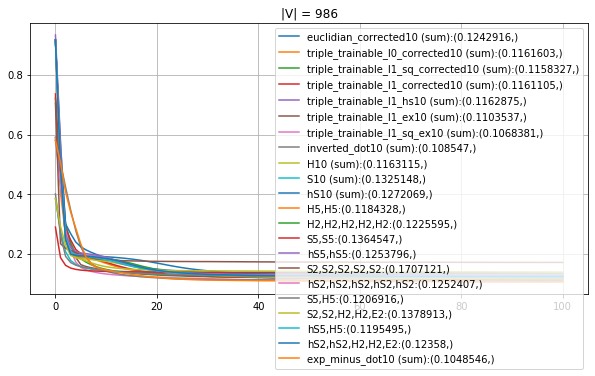


0.1242916	euclidian_corrected10 (sum)
0.1161603	triple_trainable_l0_corrected10 (sum)
0.1158327	triple_trainable_l1_sq_corrected10 (sum)
0.1161105	triple_trainable_l1_corrected10 (sum)
0.1162875	triple_trainable_l1_hs10 (sum)
0.1103537	triple_trainable_l1_ex10 (sum)
0.1068381	triple_trainable_l1_sq_ex10 (sum)
0.108547	inverted_dot10 (sum)
0.1163115	H10 (sum)
0.1325148	S10 (sum)
0.1272069	hS10 (sum)
0.1184328	H5,H5
0.1225595	H2,H2,H2,H2,H2
0.1364547	S5,S5
0.1253796	hS5,hS5
0.1707121	S2,S2,S2,S2,S2
0.1252407	hS2,hS2,hS2,hS2,hS2
0.1206916	S5,H5
0.1378913	S2,S2,H2,H2,E2
0.1195495	hS5,H5
0.12358	hS2,hS2,H2,H2,E2
0.1048546	exp_minus_dot10 (sum)


In [14]:
total_loss_story_3 = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances()+make_distances_exp_dot(), 2000, learning_rate=0.01,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

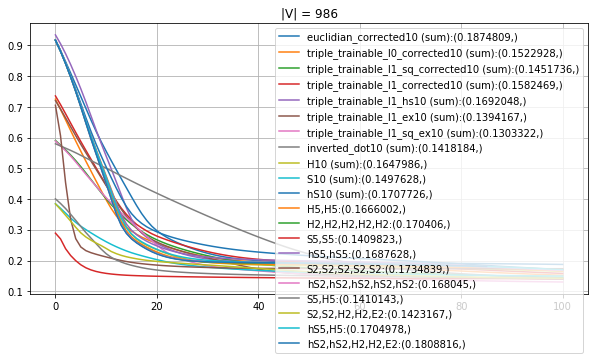

1701:0.18085711270251006
1702:0.180832596766189
1703:0.18080804902496958
1704:0.1807834772863335
1705:0.1807588810505694
1706:0.18073425752945635
1707:0.1807096044828141
1708:0.18068492853620727
1709:0.18066022113830407
1710:0.18063546949730394
1711:0.1806106746694191
1712:0.18058585437790065
1713:0.180561001791866
1714:0.18053611358790708
1715:0.18051118907191308
1716:0.18048622508062362
1717:0.18046123452730622
1718:0.18043621787913794


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
total_loss_story_4 = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances()+make_distances_exp_dot(), 2000, learning_rate=0.001,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

In [108]:
softmax_loss_storyz = list()

In [101]:
def print_best_softmax():
    for i, d in enumerate(make_distances(True)+make_distances_exp_dot()):
        ar = np.array([
            softmax_loss_story_nth[i][-1]
            for softmax_loss_story_nth in softmax_loss_storyz
        ])
        # print(ar)
        print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

In [105]:
def do_softmax_for_lr(lr=0.05):
    softmax_loss_storyz.append(
        utils.estimate_signatures_softmax(
            make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
            dists=make_distances(True)+make_distances_exp_dot(), iters=1000, learning_rate=lr,
            loss_eval_interval=20, draw_interval=20,
            print_results=True, different_d_sum=True
        )
    )
    
    print("\n\n=== Current global best:\n")
    print_best_softmax()

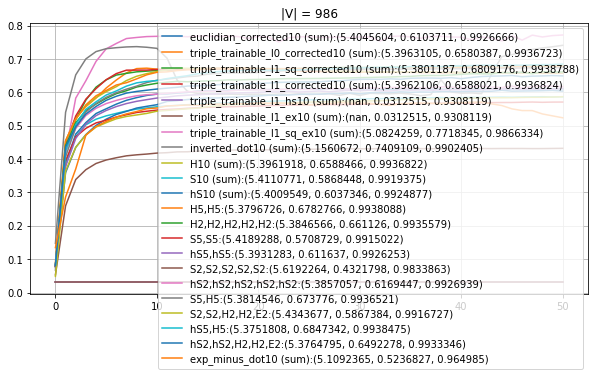


0.6103711	euclidian_corrected10 (sum)
0.6580387	triple_trainable_l0_corrected10 (sum)
0.6809176	triple_trainable_l1_sq_corrected10 (sum)
0.6588021	triple_trainable_l1_corrected10 (sum)
0.0312515	triple_trainable_l1_hs10 (sum)
0.0312515	triple_trainable_l1_ex10 (sum)
0.7718345	triple_trainable_l1_sq_ex10 (sum)
0.7409109	inverted_dot10 (sum)
0.6588466	H10 (sum)
0.5868448	S10 (sum)
0.6037346	hS10 (sum)
0.6782766	H5,H5
0.661126	H2,H2,H2,H2,H2
0.5708729	S5,S5
0.611637	hS5,hS5
0.4321798	S2,S2,S2,S2,S2
0.6169447	hS2,hS2,hS2,hS2,hS2
0.673776	S5,H5
0.5867384	S2,S2,H2,H2,E2
0.6847342	hS5,H5
0.6492278	hS2,hS2,H2,H2,E2
0.5236827	exp_minus_dot10 (sum)


In [24]:
do_softmax_for_lr(0.1)

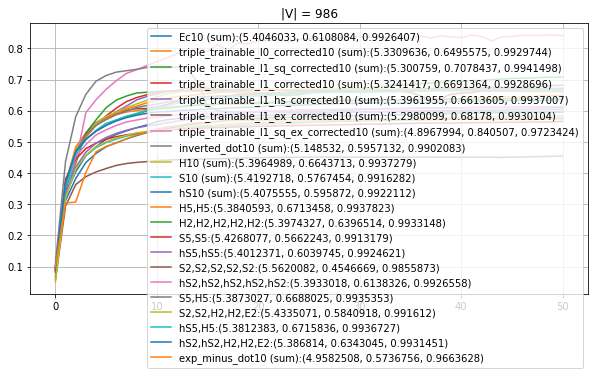

0.6108084	Ec10 (sum)
0.6495575	triple_trainable_l0_corrected10 (sum)
0.7078437	triple_trainable_l1_sq_corrected10 (sum)
0.6691364	triple_trainable_l1_corrected10 (sum)
0.6613605	triple_trainable_l1_hs_corrected10 (sum)
0.68178	triple_trainable_l1_ex_corrected10 (sum)
0.840507	triple_trainable_l1_sq_ex_corrected10 (sum)
0.5957132	inverted_dot10 (sum)
0.6643713	H10 (sum)
0.5767454	S10 (sum)
0.595872	hS10 (sum)
0.6713458	H5,H5
0.6396514	H2,H2,H2,H2,H2
0.5662243	S5,S5
0.6039745	hS5,hS5
0.4546669	S2,S2,S2,S2,S2
0.6138326	hS2,hS2,hS2,hS2,hS2
0.6688025	S5,H5
0.5840918	S2,S2,H2,H2,E2
0.6715836	hS5,H5
0.6343045	hS2,hS2,H2,H2,E2
0.5736756	exp_minus_dot10 (sum)


=== Current global best: === 

(5.4045604, 0.6108084, 0.9926666)	Ec10 (sum)
(5.3309636, 0.6580387, 0.9936723)	triple_trainable_l0_corrected10 (sum)
(5.300759, 0.7078437, 0.9941498)	triple_trainable_l1_sq_corrected10 (sum)
(5.3241417, 0.6691364, 0.9936824)	triple_trainable_l1_corrected10 (sum)
(nan, 0.6613605, 0.9937007)	triple_trainable_

In [114]:
do_softmax_for_lr(0.05)

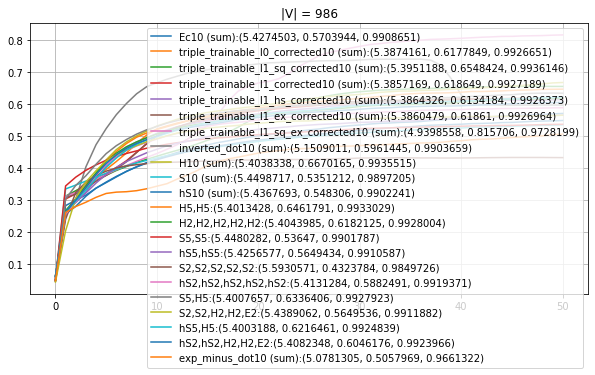

0.5703944	Ec10 (sum)
0.6177849	triple_trainable_l0_corrected10 (sum)
0.6548424	triple_trainable_l1_sq_corrected10 (sum)
0.618649	triple_trainable_l1_corrected10 (sum)
0.6134184	triple_trainable_l1_hs_corrected10 (sum)
0.61861	triple_trainable_l1_ex_corrected10 (sum)
0.815706	triple_trainable_l1_sq_ex_corrected10 (sum)
0.5961445	inverted_dot10 (sum)
0.6670165	H10 (sum)
0.5351212	S10 (sum)
0.548306	hS10 (sum)
0.6461791	H5,H5
0.6182125	H2,H2,H2,H2,H2
0.53647	S5,S5
0.5649434	hS5,hS5
0.4323784	S2,S2,S2,S2,S2
0.5882491	hS2,hS2,hS2,hS2,hS2
0.6336406	S5,H5
0.5649536	S2,S2,H2,H2,E2
0.6216461	hS5,H5
0.6046176	hS2,hS2,H2,H2,E2
0.5057969	exp_minus_dot10 (sum)


=== Current global best: === 

(5.4045604, 0.6108084, 0.9926666)	Ec10 (sum)
(5.3309636, 0.6580387, 0.9936723)	triple_trainable_l0_corrected10 (sum)
(5.300759, 0.7078437, 0.9941498)	triple_trainable_l1_sq_corrected10 (sum)
(5.3241417, 0.6691364, 0.9936824)	triple_trainable_l1_corrected10 (sum)
(nan, 0.6613605, 0.9937007)	triple_trainable_l1_

In [115]:
do_softmax_for_lr(0.01)

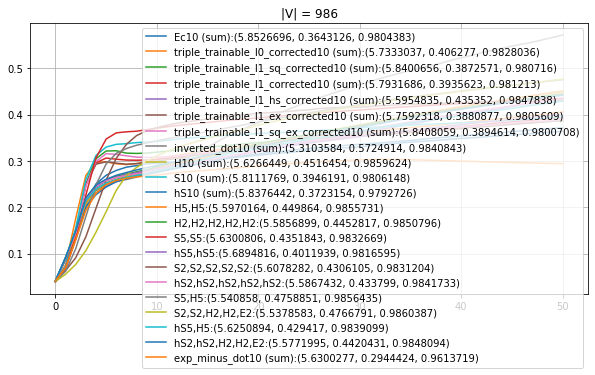

0.3643126	Ec10 (sum)
0.406277	triple_trainable_l0_corrected10 (sum)
0.3872571	triple_trainable_l1_sq_corrected10 (sum)
0.3935623	triple_trainable_l1_corrected10 (sum)
0.435352	triple_trainable_l1_hs_corrected10 (sum)
0.3880877	triple_trainable_l1_ex_corrected10 (sum)
0.3894614	triple_trainable_l1_sq_ex_corrected10 (sum)
0.5724914	inverted_dot10 (sum)
0.4516454	H10 (sum)
0.3946191	S10 (sum)
0.3723154	hS10 (sum)
0.449864	H5,H5
0.4452817	H2,H2,H2,H2,H2
0.4351843	S5,S5
0.4011939	hS5,hS5
0.4306105	S2,S2,S2,S2,S2
0.433799	hS2,hS2,hS2,hS2,hS2
0.4758851	S5,H5
0.4766791	S2,S2,H2,H2,E2
0.429417	hS5,H5
0.4420431	hS2,hS2,H2,H2,E2
0.2944424	exp_minus_dot10 (sum)


=== Current global best: === 

(5.4045604, 0.6108084, 0.9926666)	Ec10 (sum)
(5.3309636, 0.6580387, 0.9936723)	triple_trainable_l0_corrected10 (sum)
(5.300759, 0.7078437, 0.9941498)	triple_trainable_l1_sq_corrected10 (sum)
(5.3241417, 0.6691364, 0.9936824)	triple_trainable_l1_corrected10 (sum)
(nan, 0.6613605, 0.9937007)	triple_trainable_l

In [116]:
do_softmax_for_lr(0.001)

##### triple_trainable_l1_ex_corrected10 somehow failed to converge due to numerical stuff -  nan thrown, lets restart
##### (triple_trainable_l1_sq_ex_corrected10) is the best anyway

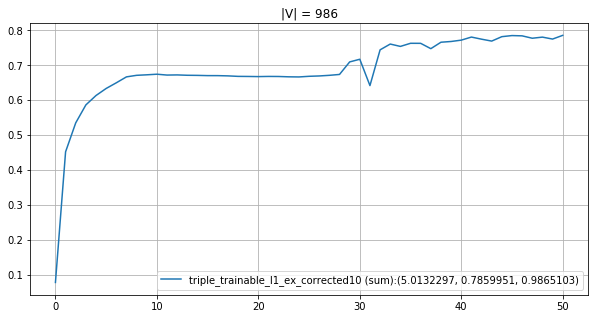


0.7859951	triple_trainable_l1_ex_corrected10 (sum)


[[(6.9020179, 0.0778981, 0.9644817),
  (5.6264343, 0.4523019, 0.9857167),
  (5.4864107, 0.5352145, 0.9900691),
  (5.450026, 0.5866852, 0.9918344),
  (5.432205, 0.6136135, 0.9926062),
  (5.4221765, 0.6338056, 0.9930459),
  (5.4147812, 0.6500454, 0.9933338),
  (5.4094419, 0.6670081, 0.9935316),
  (5.4057126, 0.6714598, 0.9936385),
  (5.4033075, 0.6729199, 0.9937118),
  (5.4017256, 0.6746398, 0.9937568),
  (5.4006593, 0.6721846, 0.9937787),
  (5.3999096, 0.6726214, 0.9937987),
  (5.3993288, 0.6715959, 0.9938087),
  (5.3988523, 0.6712823, 0.9938119),
  (5.3984533, 0.6706153, 0.9938128),
  (5.3981179, 0.6705709, 0.993812),
  (5.3978335, 0.6698747, 0.9938063),
  (5.3975856, 0.6684457, 0.9937972),
  (5.3973707, 0.6682013, 0.9937918),
  (5.3971591, 0.6678006, 0.9937856),
  (5.3969775, 0.6682851, 0.9937837),
  (5.3967565, 0.6681071, 0.9937801),
  (5.3965143, 0.6671779, 0.9937746),
  (5.3963618, 0.66682, 0.9937667),
  (5.395787, 0.6686439, 0.9937605),
  (5.3949825, 0.6696506, 0.9937498),
  (5.39

In [13]:
utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances_5(True), iters=1000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)

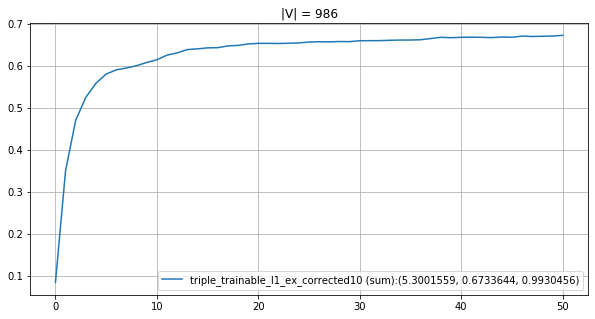


0.6733644	triple_trainable_l1_ex_corrected10 (sum)


[[(6.9025674, 0.0837366, 0.9645063),
  (5.8526987, 0.3507375, 0.9788291),
  (5.5348621, 0.4710231, 0.98586),
  (5.4661556, 0.525643, 0.9890508),
  (5.4424166, 0.559222, 0.9906165),
  (5.4294223, 0.5809371, 0.991477),
  (5.4201808, 0.5910314, 0.9919238),
  (5.4118807, 0.5955308, 0.99214),
  (5.4034096, 0.6010249, 0.9922932),
  (5.3955024, 0.6086409, 0.9924476),
  (5.3872219, 0.6151158, 0.9925793),
  (5.3783125, 0.6261503, 0.9926884),
  (5.3715777, 0.6315314, 0.9927402),
  (5.3673929, 0.6394319, 0.9927628),
  (5.3644008, 0.6412413, 0.9927634),
  (5.3617902, 0.6435046, 0.9927747),
  (5.3595498, 0.64398, 0.9927694),
  (5.3575154, 0.6481959, 0.9927827),
  (5.3555126, 0.6493779, 0.9927824),
  (5.3535094, 0.6528309, 0.9928071),
  (5.3515795, 0.6542364, 0.9928229),
  (5.349756, 0.6542491, 0.9928279),
  (5.3480315, 0.6539195, 0.9928317),
  (5.3463813, 0.6545248, 0.9928413),
  (5.3447214, 0.6553349, 0.9928537),
  (5.3431173, 0.6573521, 0.9928651),
  (5.3414878, 0.6581717, 0.9928682),
  (5.339927

In [14]:
utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances_5(True), iters=1000, learning_rate=0.05,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)

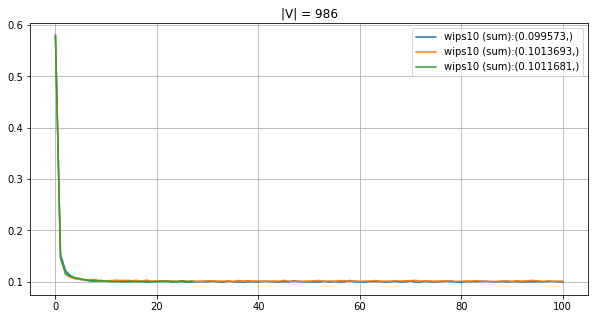

541:0.10048549275413925
542:0.1001172799344523
543:0.09967289440730612
544:0.09940073015242122
545:0.10076786679640741
546:0.10100267946655399
547:0.09991689374446588
548:0.1008151771034155
549:0.10052156437056399
550:0.10017953112359475
551:0.10090475300425282
552:0.10057012397531546
553:0.09985675344077143
554:0.10055291026044337


KeyboardInterrupt: 

In [31]:
L = list()
for lr in [0.1, 0.05, 0.01, 0.001]:
    story = utils.estimate_signatures_distortion(
        make_model_2, qs, distances_matrix, r_matrix,
        make_distances_wips(False, 3)+make_distances_exp_dot(), 2000, learning_rate=lr,
        loss_eval_interval=20, draw_interval=20,
        different_d_sum=True, print_results=True
    )
    vs = np.array(story)[:, -1, 0]
    L.append(vs)
    print(lr, "\t->\t", vs.mean(), vs.std())
print("=====")
for L_i in L:
    print(L_i.mean(), L_i.std())

In [ ]:
storyz = [total_loss_story, total_loss_story_2, total_loss_story_3, total_loss_story_4]
for d, l0, l1, l2, l3 in zip(make_distances()+make_distances_exp_dot(), *storyz):
    ar = np.array([x[-1] for x in [l0, l1, l2, l3]])
    # print(f"{ar[:, 0].argmin(), ar[:, 1:].argmax(axis=0)}\t{d}")
    print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

In [ ]:
import networkx as nx
plt.figure(figsize=(8, 8))
nx.draw_spring(G,
    node_color=["red" if (x < 20) else "blue" for x in G.nodes()],
    node_size=[100 if (x < 20) else 10 for x in G.nodes()]
)
plt.savefig("bg.png")

In [ ]:
G.edges()

In [ ]:
distances_matrix[3]

In [ ]:
G.nodes()